In [4]:
# !pip install xgboost

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data exploration

In [6]:
df = pd.read_csv("Churn_Modelling.csv")

In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.drop("RowNumber", axis=1, inplace=True)
df.drop("CustomerId", axis=1, inplace=True)
df.drop("Surname", axis=1, inplace=True)

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Feature engineering for EDA

In [13]:
df["CreditCard"] = df["HasCrCard"].apply(lambda x: "credit card present" if x == 1 else "no credit card")
df["IsActive"] = df["IsActiveMember"].apply(lambda x: "active" if x == 1 else "not active")
df["outcome"] = df["Exited"].apply(lambda x: "quit" if x == 1 else "did not quit")

In [14]:
df["gender_quit"] = df["Gender"] + '-' + df["outcome"]
df["geography_quit"] = df["Geography"] + '-' + df["outcome"]
df["card_quit"] = df["CreditCard"] + '-' + df["outcome"]
df["active_quit"] = df["IsActive"] + '-' + df["outcome"]

# EDA

# Pie charts

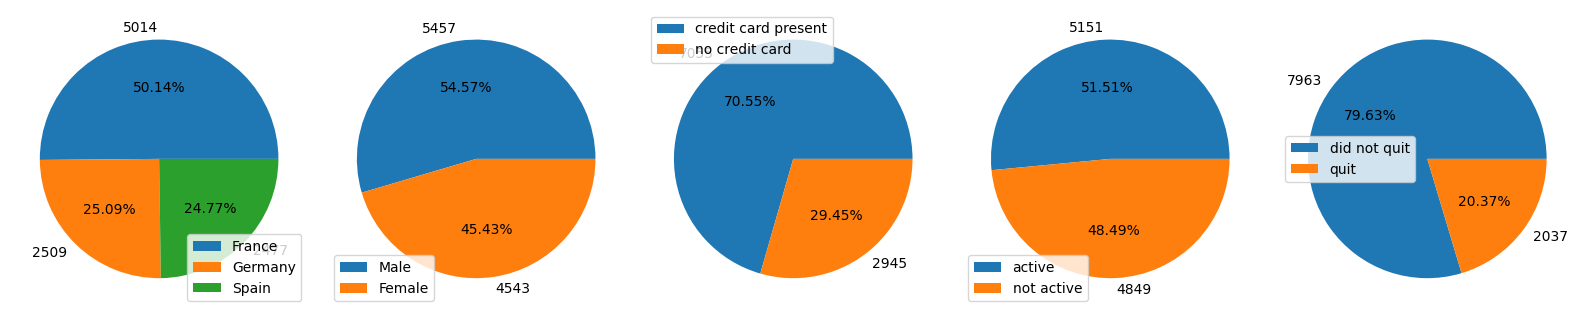

In [15]:
pies = ["Geography", "Gender", "CreditCard", "IsActive", "outcome"]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 8))
for i in range(len(pies)):
    counts = df[pies[i]].value_counts()
    axes[i].pie(counts, autopct="%0.2f%%", labels=counts)
    axes[i].legend(counts.index)
    
plt.tight_layout()
plt.show()

# Which count of categories of customers that quit and did not quit

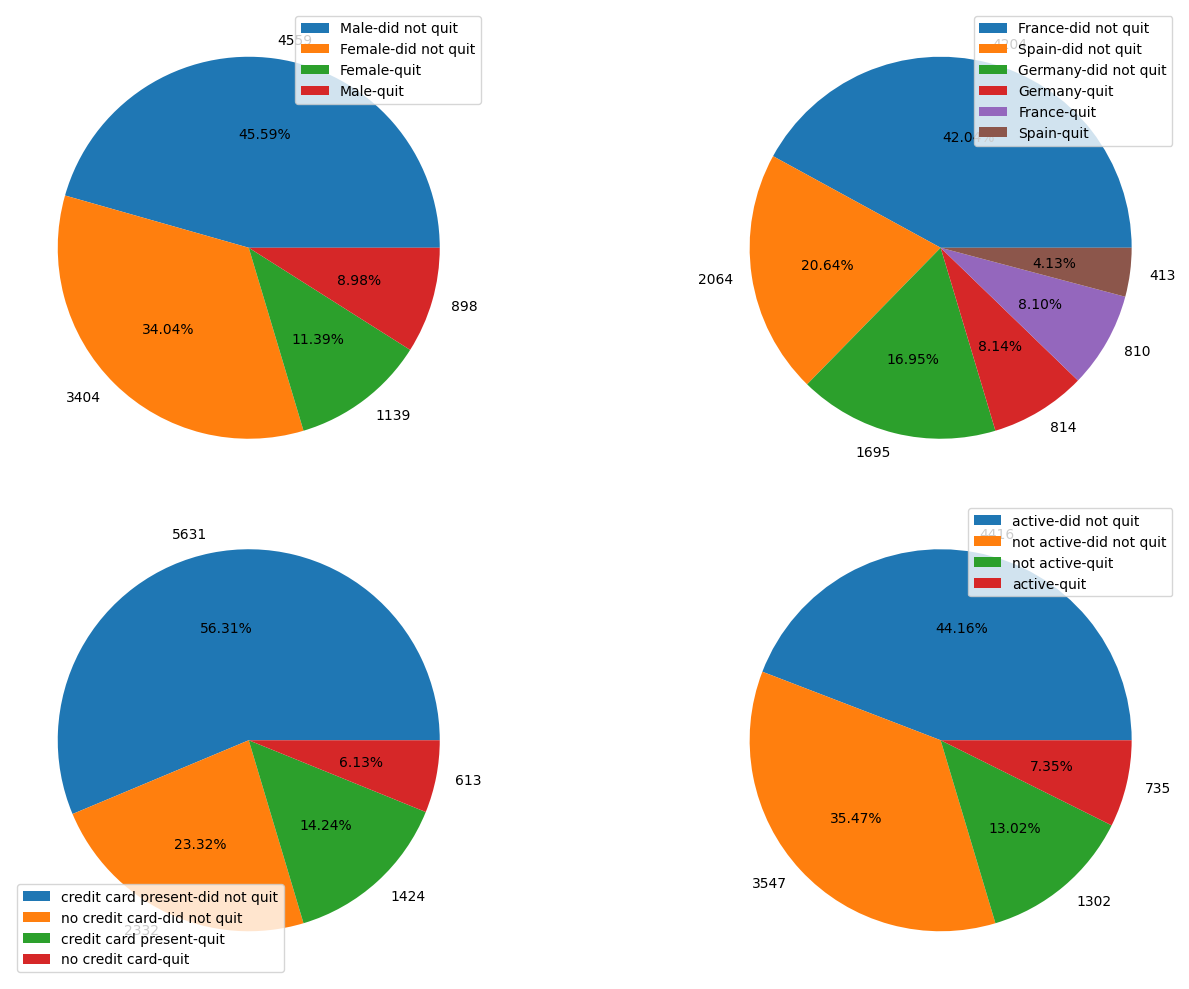

In [16]:
cols = df.columns[-4:]
index = 0
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
for i in range(2):
    for j in range(2):
        counts = df[cols[index]].value_counts()
        axes[i][j].pie(counts, autopct="%0.2f%%", labels=counts)
        axes[i][j].legend(counts.index)
        index += 1
plt.tight_layout()
plt.show()

# KDEPlot for numerical values

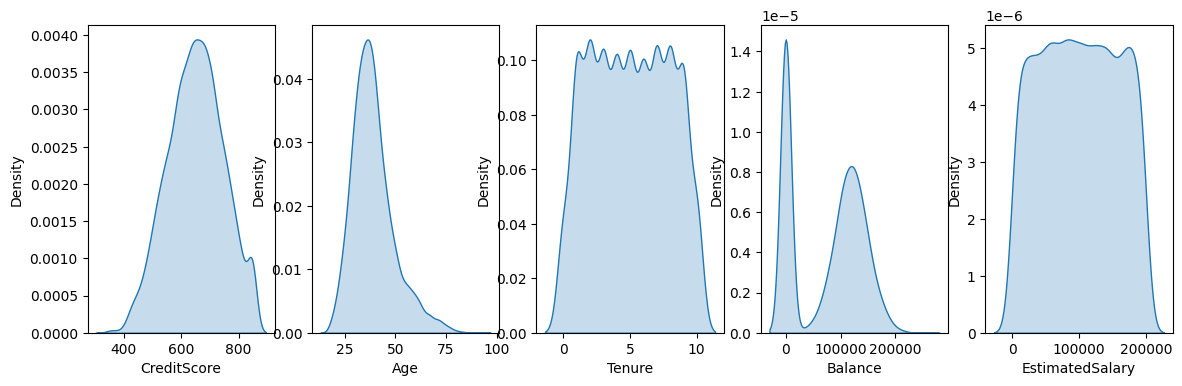

In [17]:
numericals = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 4))
for i in range(len(numericals)):
    sns.kdeplot(df, x=numericals[i], ax=axes[i], fill=True)
    
plt.show()

# Pairplot

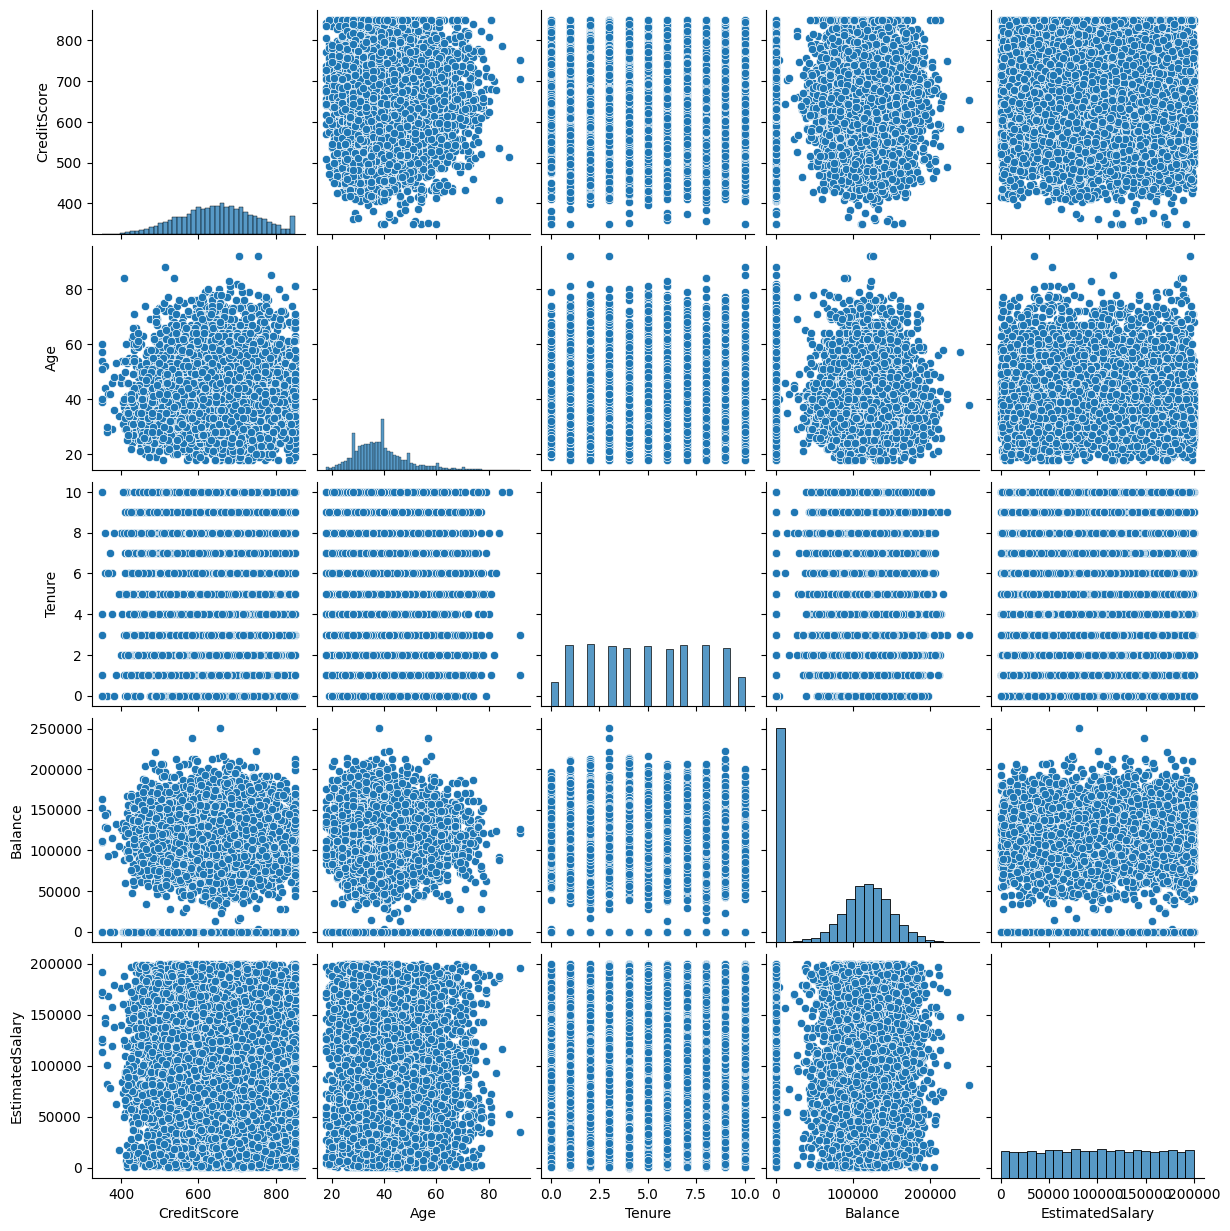

In [18]:
sns.pairplot(df, vars=numericals)
plt.show()

# Numerical data distribution among different classes - kdeplots, boxplots and barplots

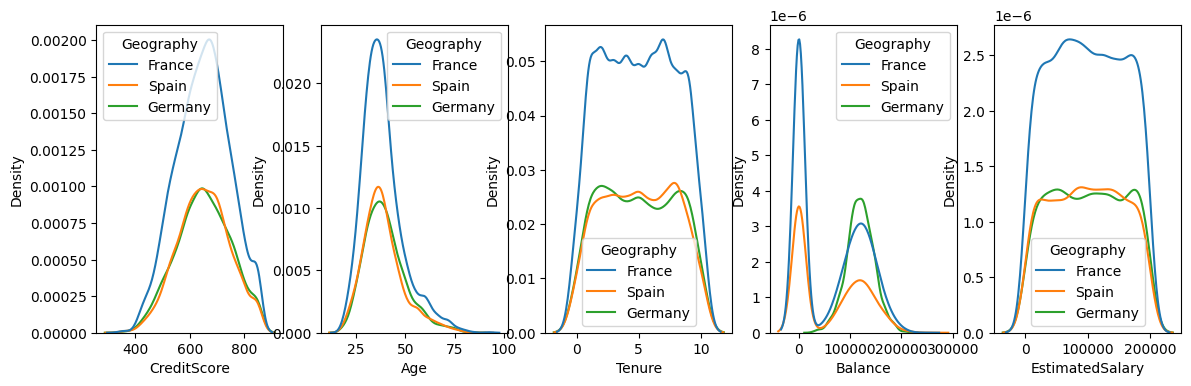

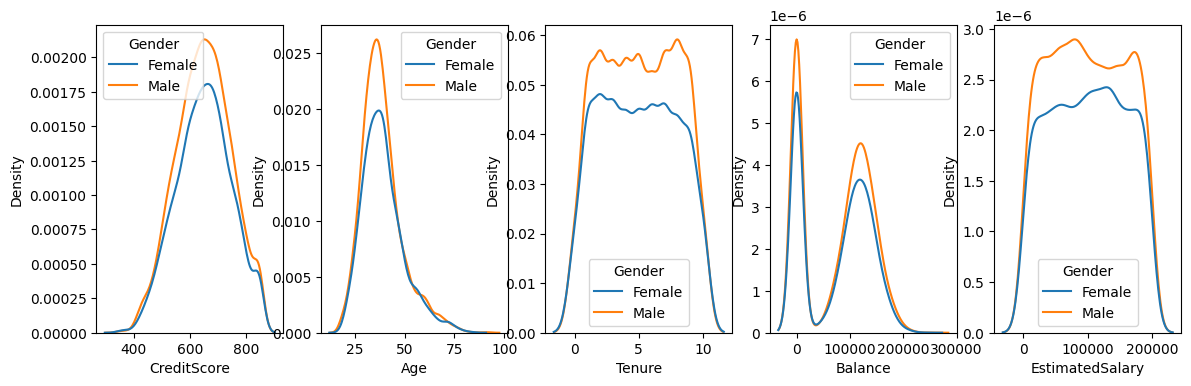

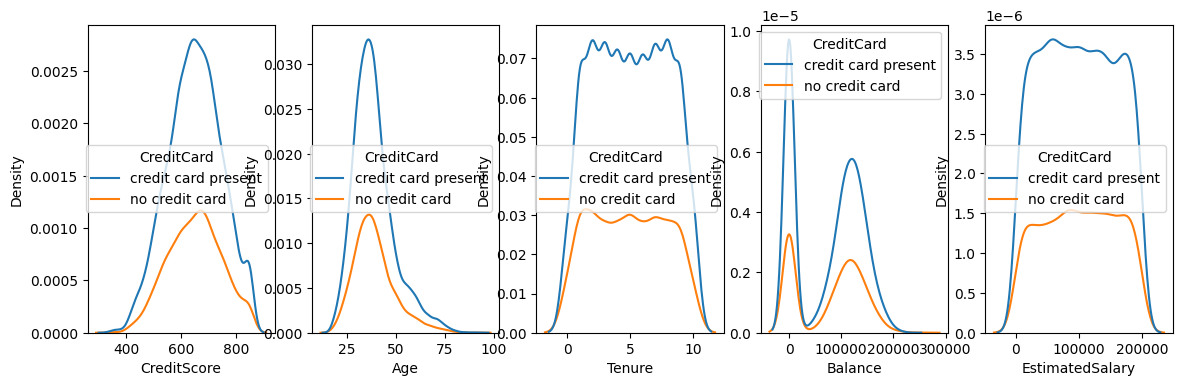

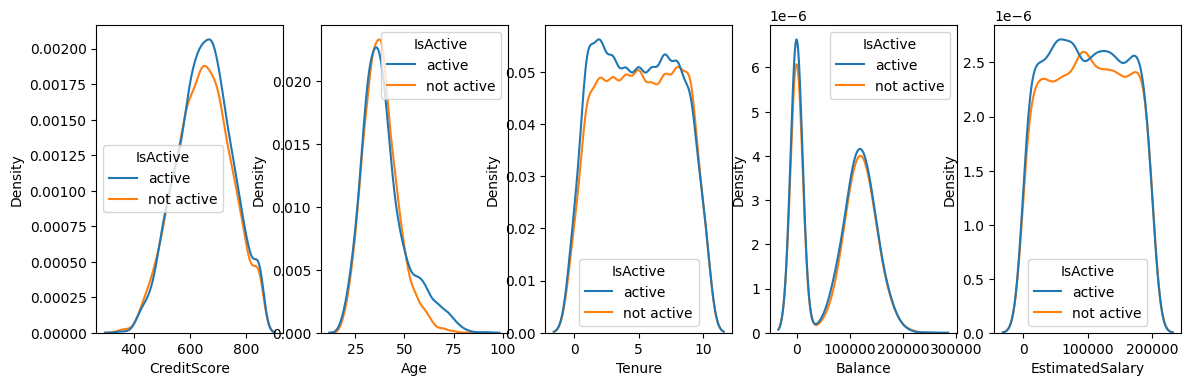

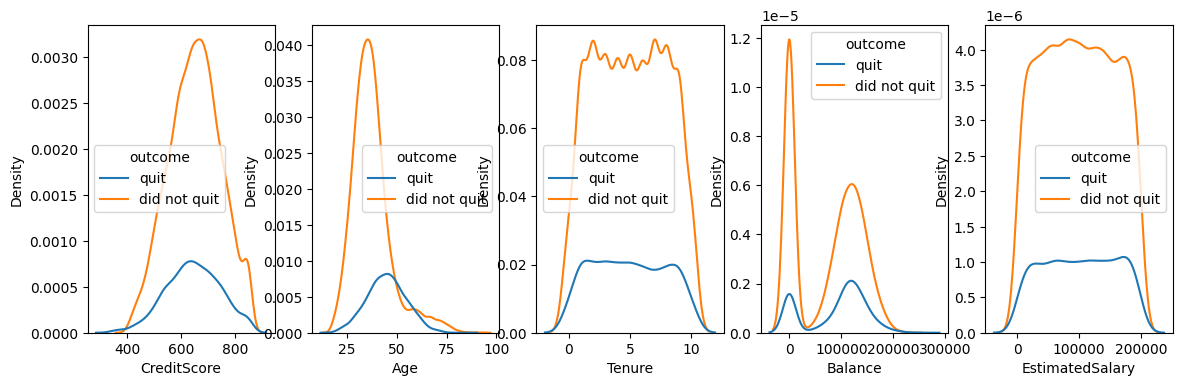

In [19]:
for j in range(len(pies)):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 4))
    for i in range(len(numericals)):
        sns.kdeplot(df, x=numericals[i], hue=pies[j], ax=axes[i])

    plt.show()

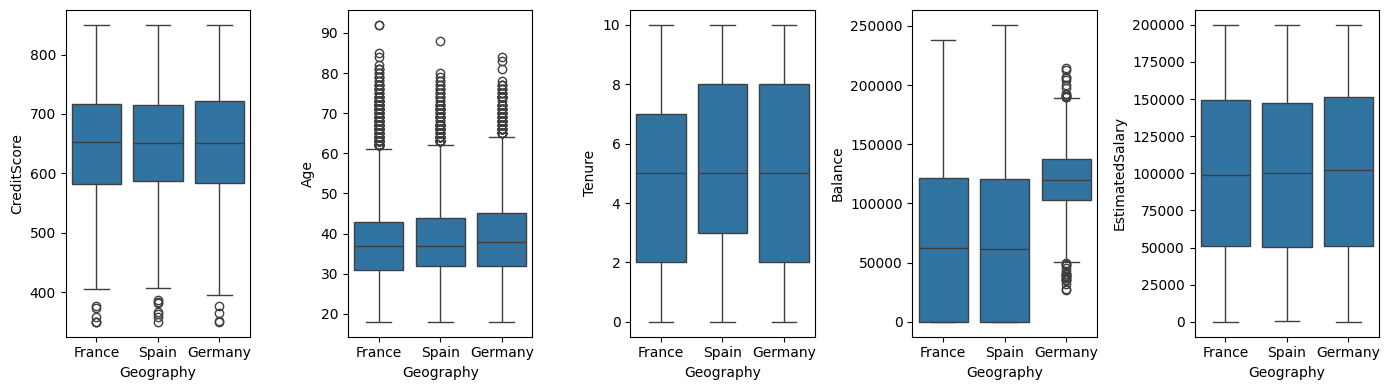

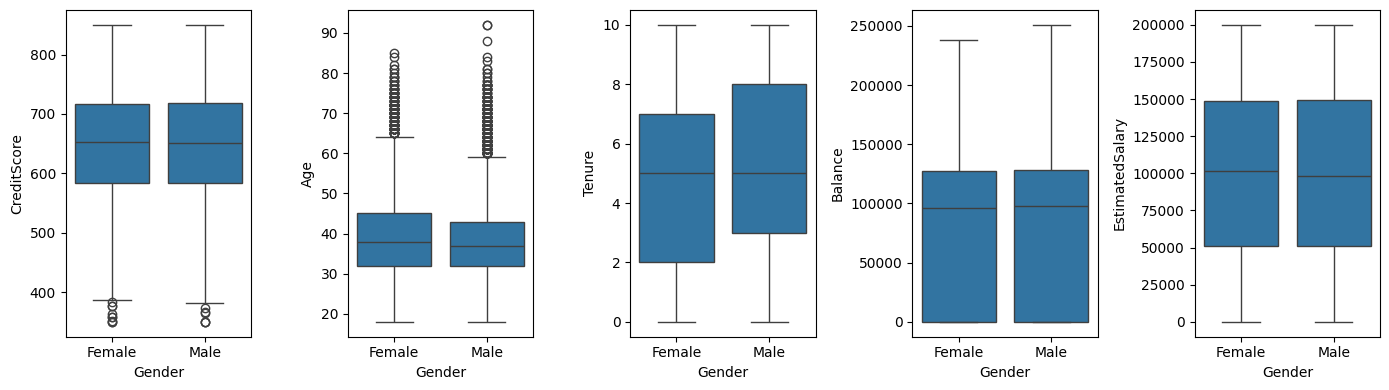

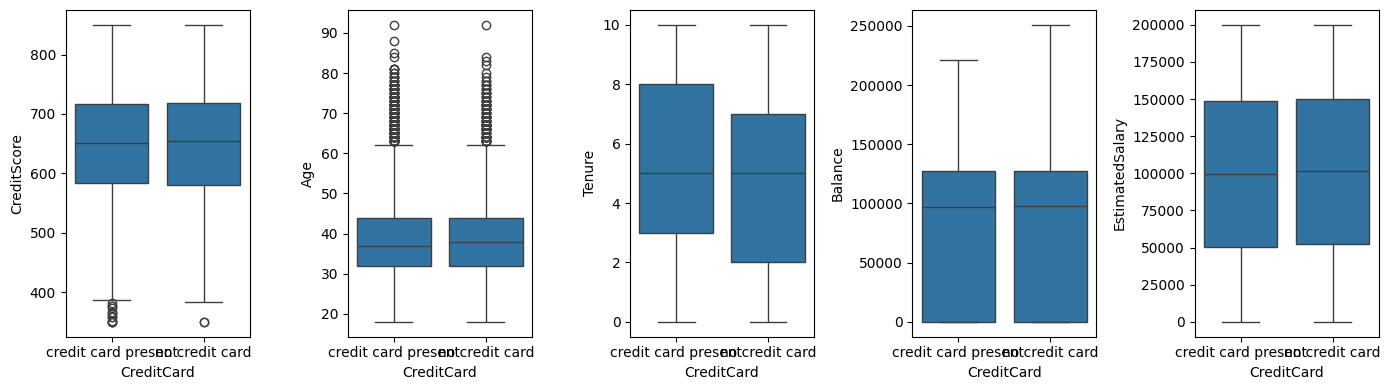

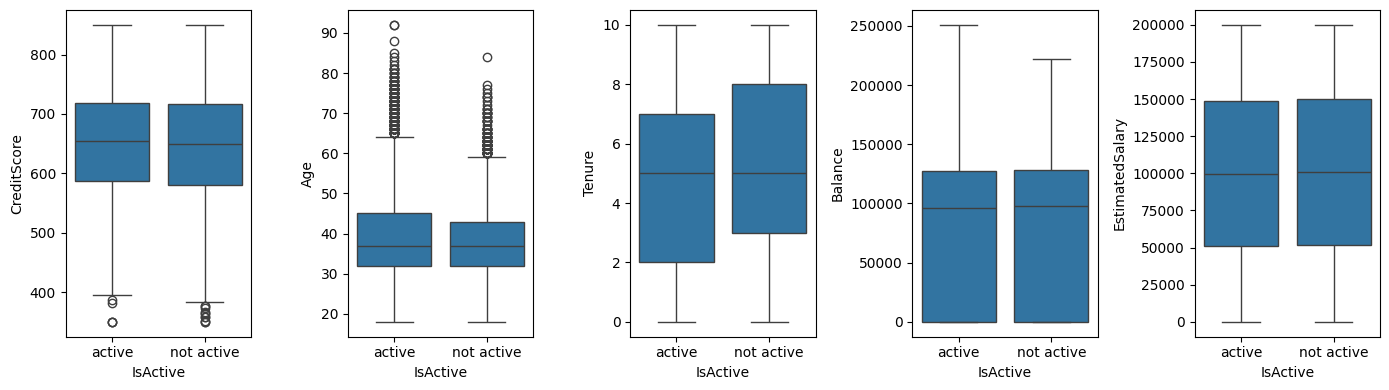

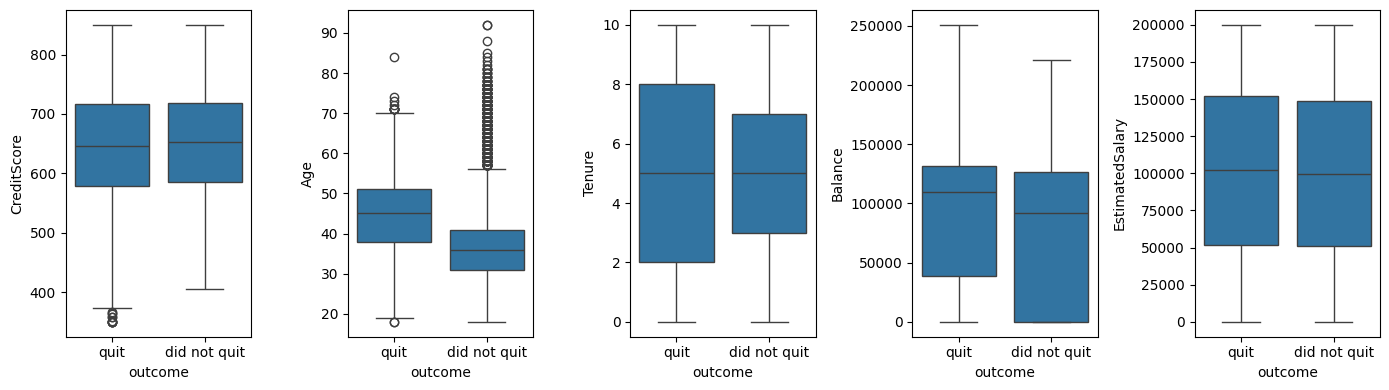

In [20]:
for j in range(len(pies)):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 4))
    for i in range(len(numericals)):
        sns.boxplot(df, x=pies[j], y=numericals[i], ax=axes[i])
    plt.tight_layout()
    plt.show()

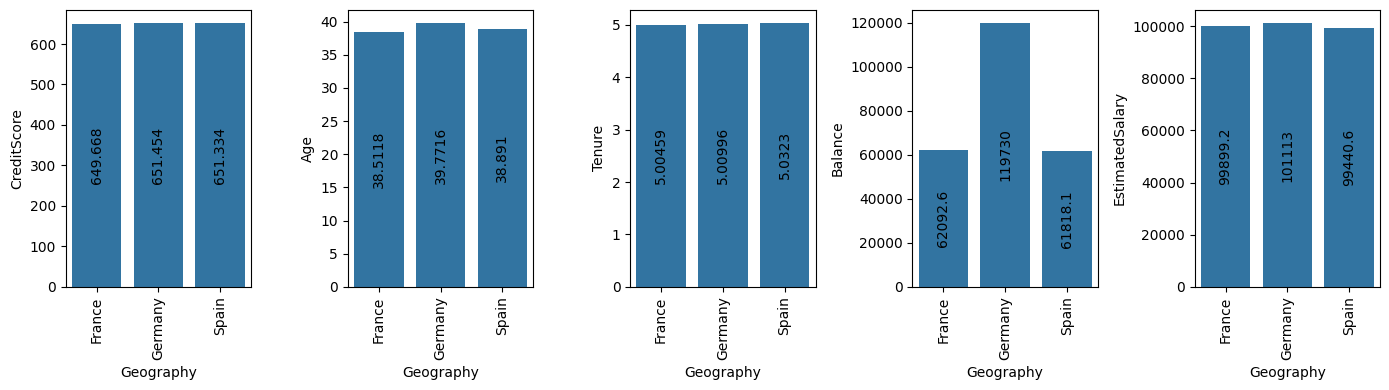

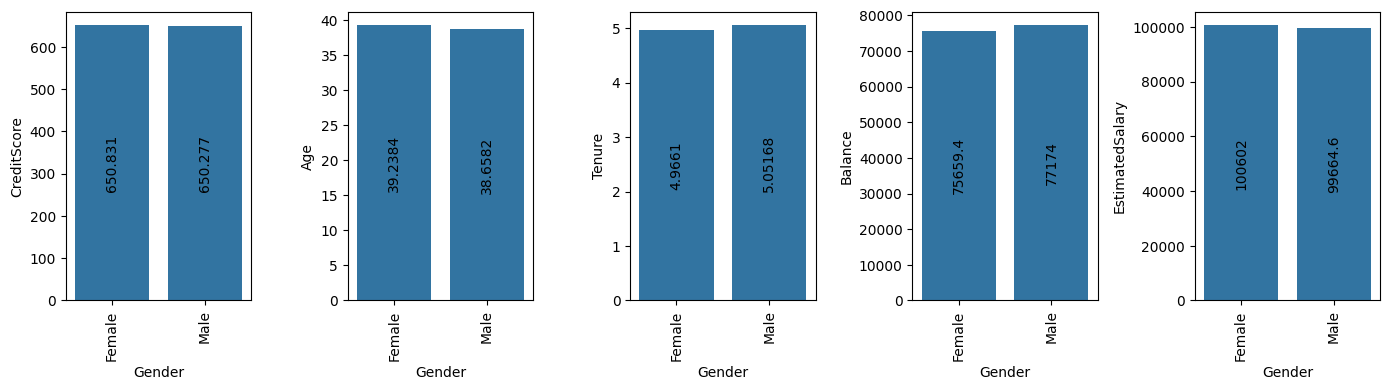

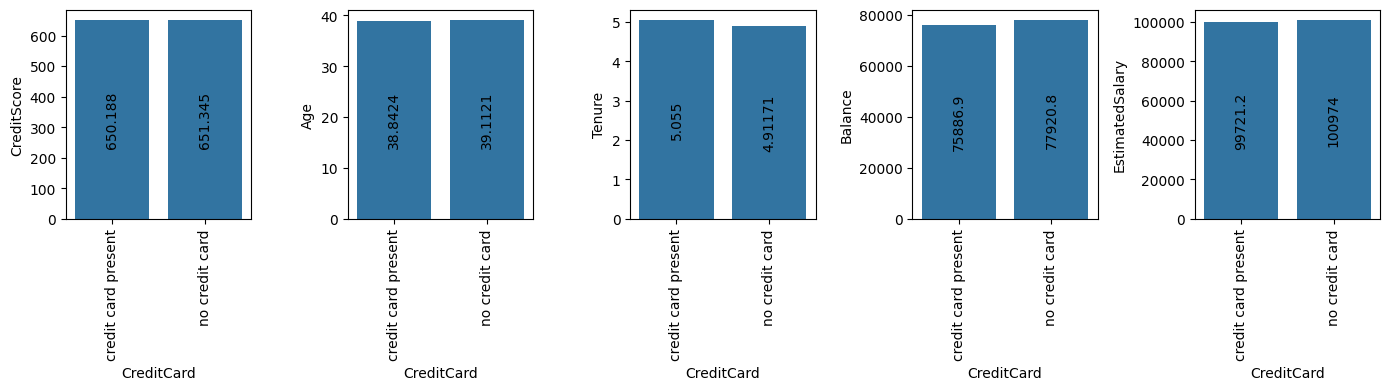

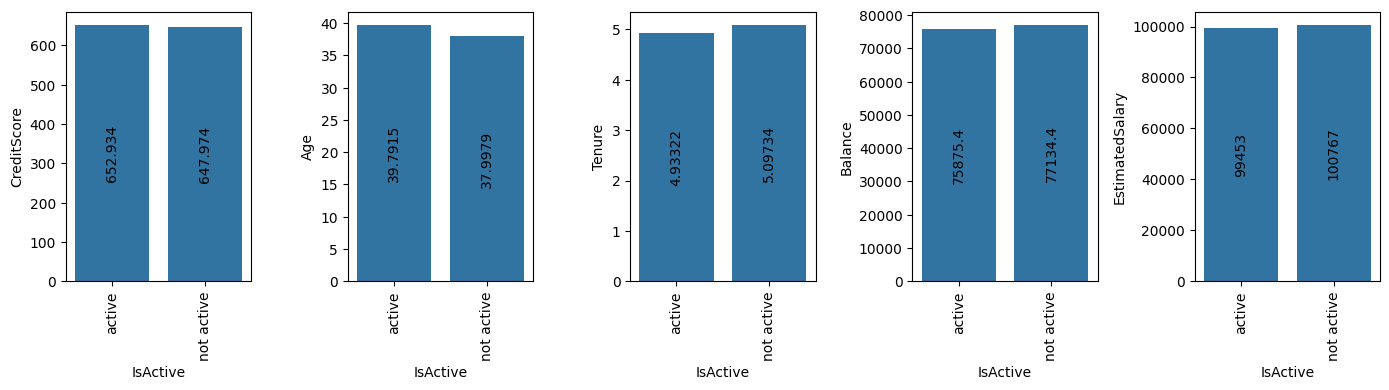

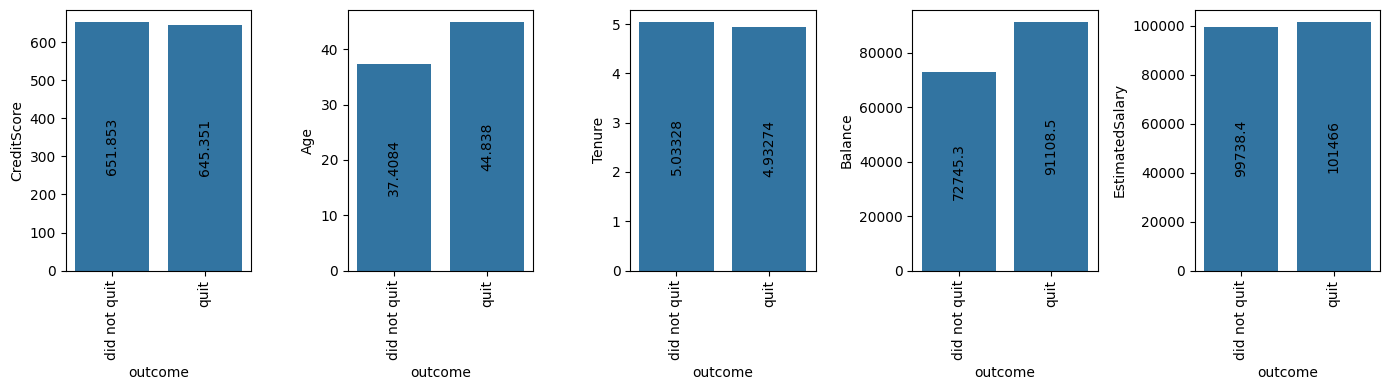

In [21]:
for j in range(len(pies)):
    grouped = df.groupby(pies[j])
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 4))
    for i in range(len(numericals)):
        means = grouped[numericals[i]].mean()
        sns.barplot(x=means.index, y=means, ax=axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container, label_type="center", rotation=90)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()

# Encoding

In [22]:
to_encoder = ["Geography", "Gender"]
le = LabelEncoder()
for i in to_encoder:
    df[i] = le.fit_transform(df[i])

# Scaling values

In [23]:
x = df.iloc[:, :10].values
y = df.iloc[:, 10].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [24]:
def training(model, name):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    print(report)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True)
    plt.title("{}: {}%".format(name, round(score*100, 2)))
    plt.show()

# Defining models and tuning their parameters

In [ ]:
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier(learning_rate=0.9)
abc = AdaBoostClassifier(learning_rate=0.9)
svc = SVC(C=0.9)
xgb = XGBClassifier(learning_rate=0.9)

models = [rfc, etc, gbc, abc, svc, xgb]
names = ["Random Forest", "Extra Trees", "Gradient Boosting", "Ada Boost",
        "Support Vectors", "XGB"]

# Training and evaluating models

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000



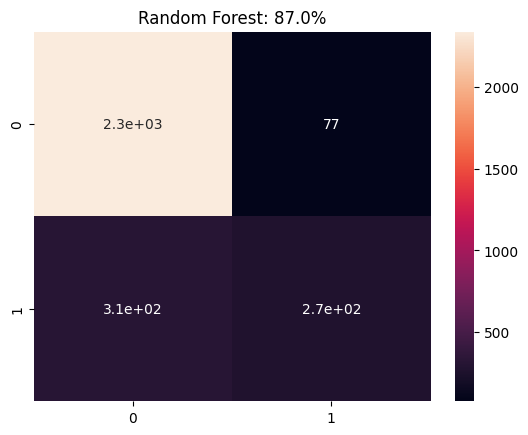



              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.76      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



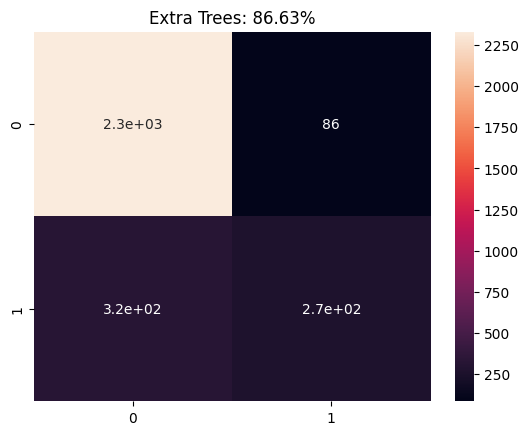



              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2416
           1       0.64      0.48      0.55       584

    accuracy                           0.85      3000
   macro avg       0.76      0.71      0.73      3000
weighted avg       0.84      0.85      0.84      3000



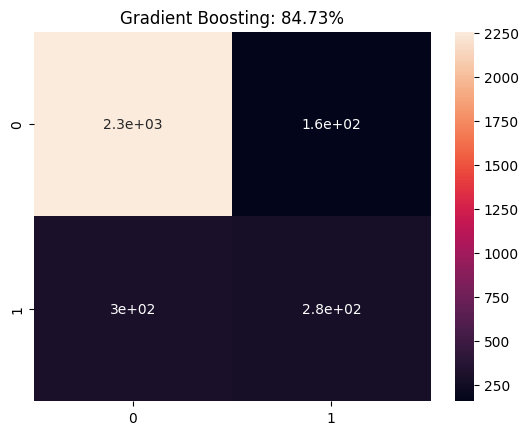



              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2416
           1       0.71      0.47      0.56       584

    accuracy                           0.86      3000
   macro avg       0.79      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



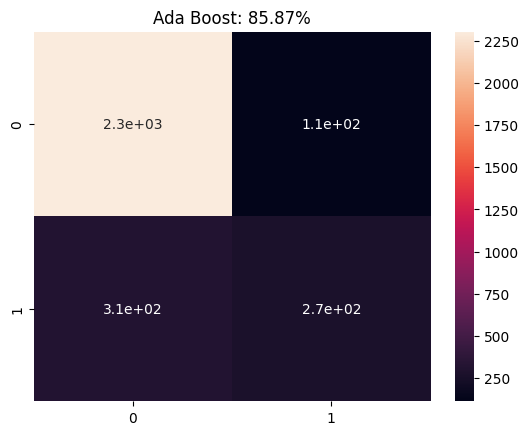



              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2416
           1       0.88      0.30      0.45       584

    accuracy                           0.86      3000
   macro avg       0.87      0.65      0.68      3000
weighted avg       0.86      0.86      0.83      3000



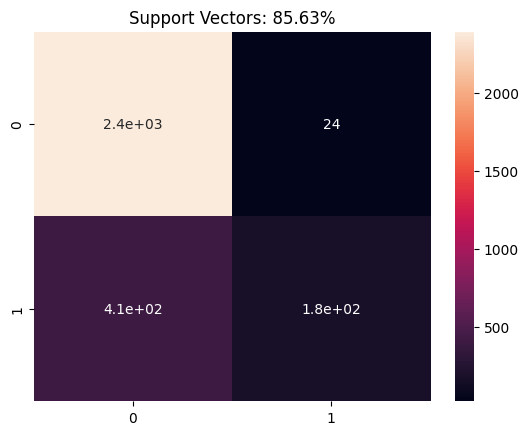



              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2416
           1       0.64      0.51      0.57       584

    accuracy                           0.85      3000
   macro avg       0.77      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000



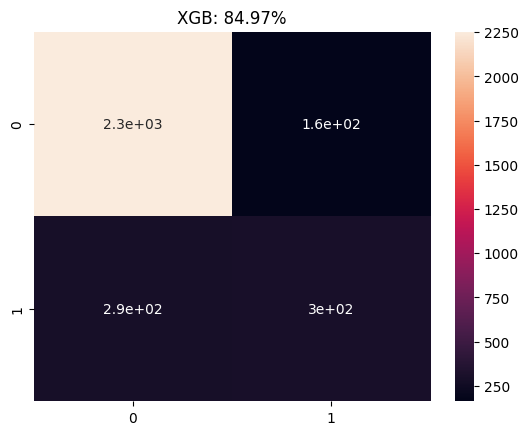

In [ ]:
for i, j in zip(models, names):
    training(i, j)
    print()
    print()